In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [178]:
df = pd.read_csv('/content/sample_data/imdb_top_2000_movies.csv')

In [179]:
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [181]:
df.describe()

,Duration,IMDB Rating,Metascore
count,2000.000000,2000.000000,1919.000000
mean,113.939000,6.922600,61.044294
std,22.946035,0.955618,17.937722
min,50.000000,1.500000,9.000000
25%,98.000000,6.400000,48.000000
50%,110.000000,7.000000,61.000000
75%,125.000000,7.600000,74.000000
max,271.000000,9.300000,100.000000


In [182]:
df.isnull().sum()

,0
Movie Name,0
Release Year,0
Duration,0
IMDB Rating,0
Metascore,81
Votes,0
Genre,0
Director,0
Cast,0
Gross,97


In [183]:
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].median())

In [184]:
df['Metascore'].isna().sum()

np.int64(0)

In [185]:
df['Release Year'] = df['Release Year'].astype(str).str.extract(r'(\d{4})').astype(np.int64)

In [186]:
df['Votes'] = df['Votes'].str.replace(',',"",regex=False).astype(np.int64)

In [187]:
df['Gross'] = (df['Gross']
               .astype(str)
               .str.replace('$','',regex=False)
               .str.replace('M','',regex=False)
               .str.replace(',','',regex=False))

In [188]:
df['Gross'] = pd.to_numeric(df['Gross'],errors='coerce')

In [189]:
df['Gross'].isnull().sum()

np.int64(97)

In [190]:
df['Gross'] = df['Gross'].fillna(df['Gross'].median())


In [191]:
num_cols = ['Release Year','Duration','IMDB Rating','Metascore','Votes','Gross']

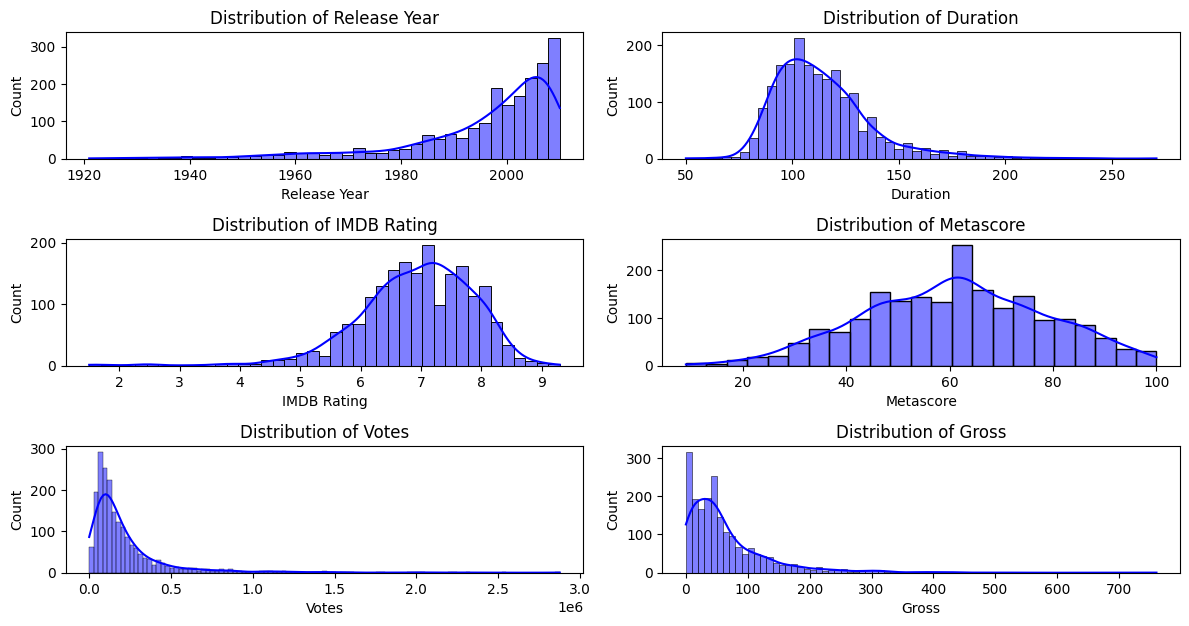

In [192]:
plt.figure(figsize=(12,8))
for i , col in enumerate(num_cols,1):
  plt.subplot(4,2,i)
  sns.histplot(df[col],kde=True,color='blue')
  plt.title(f'Distribution of {col}')
plt.tight_layout()

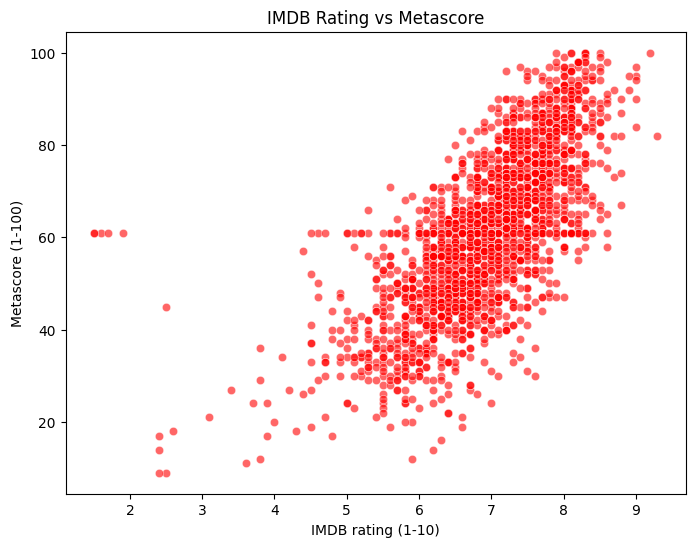

In [193]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='IMDB Rating',y='Metascore',color='red',alpha=0.6)
plt.title('IMDB Rating vs Metascore')
plt.xlabel('IMDB rating (1-10)')
plt.ylabel('Metascore (1-100)')
plt.show()

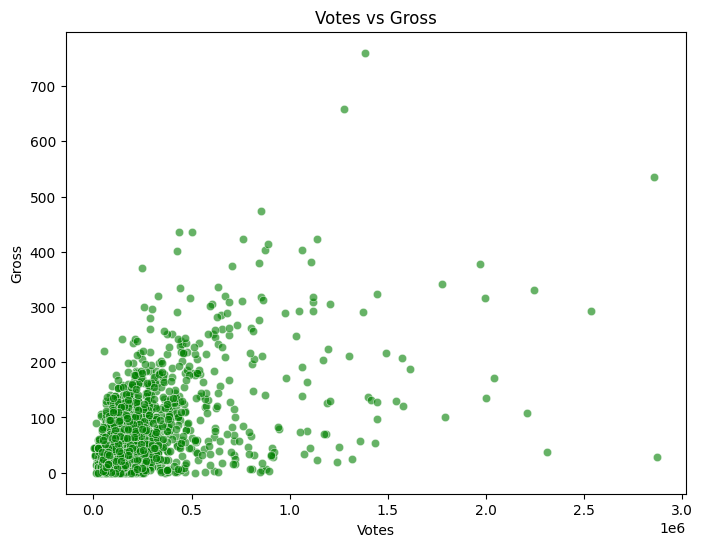

In [194]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Votes',y='Gross',color='green',alpha=0.6)
plt.xlabel('Votes')
plt.ylabel('Gross')
plt.title('Votes vs Gross')
plt.show()

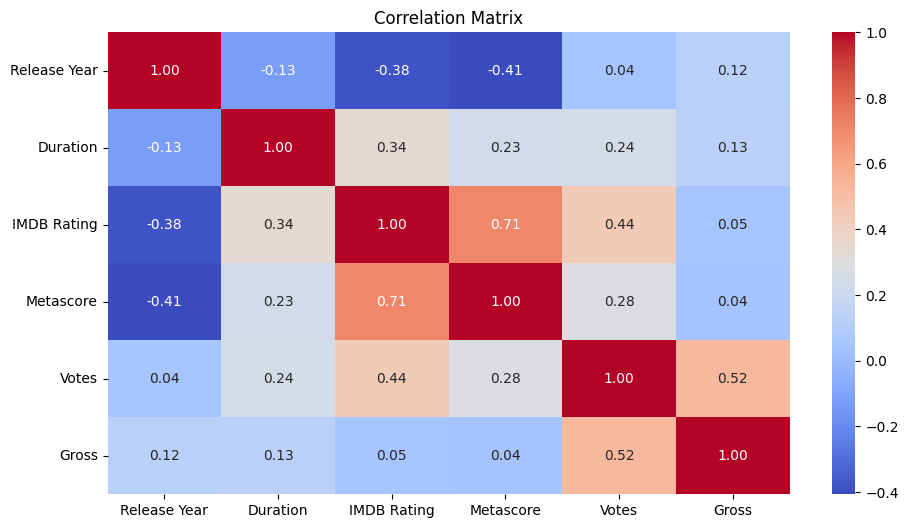

In [195]:
plt.figure(figsize=(11,6))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

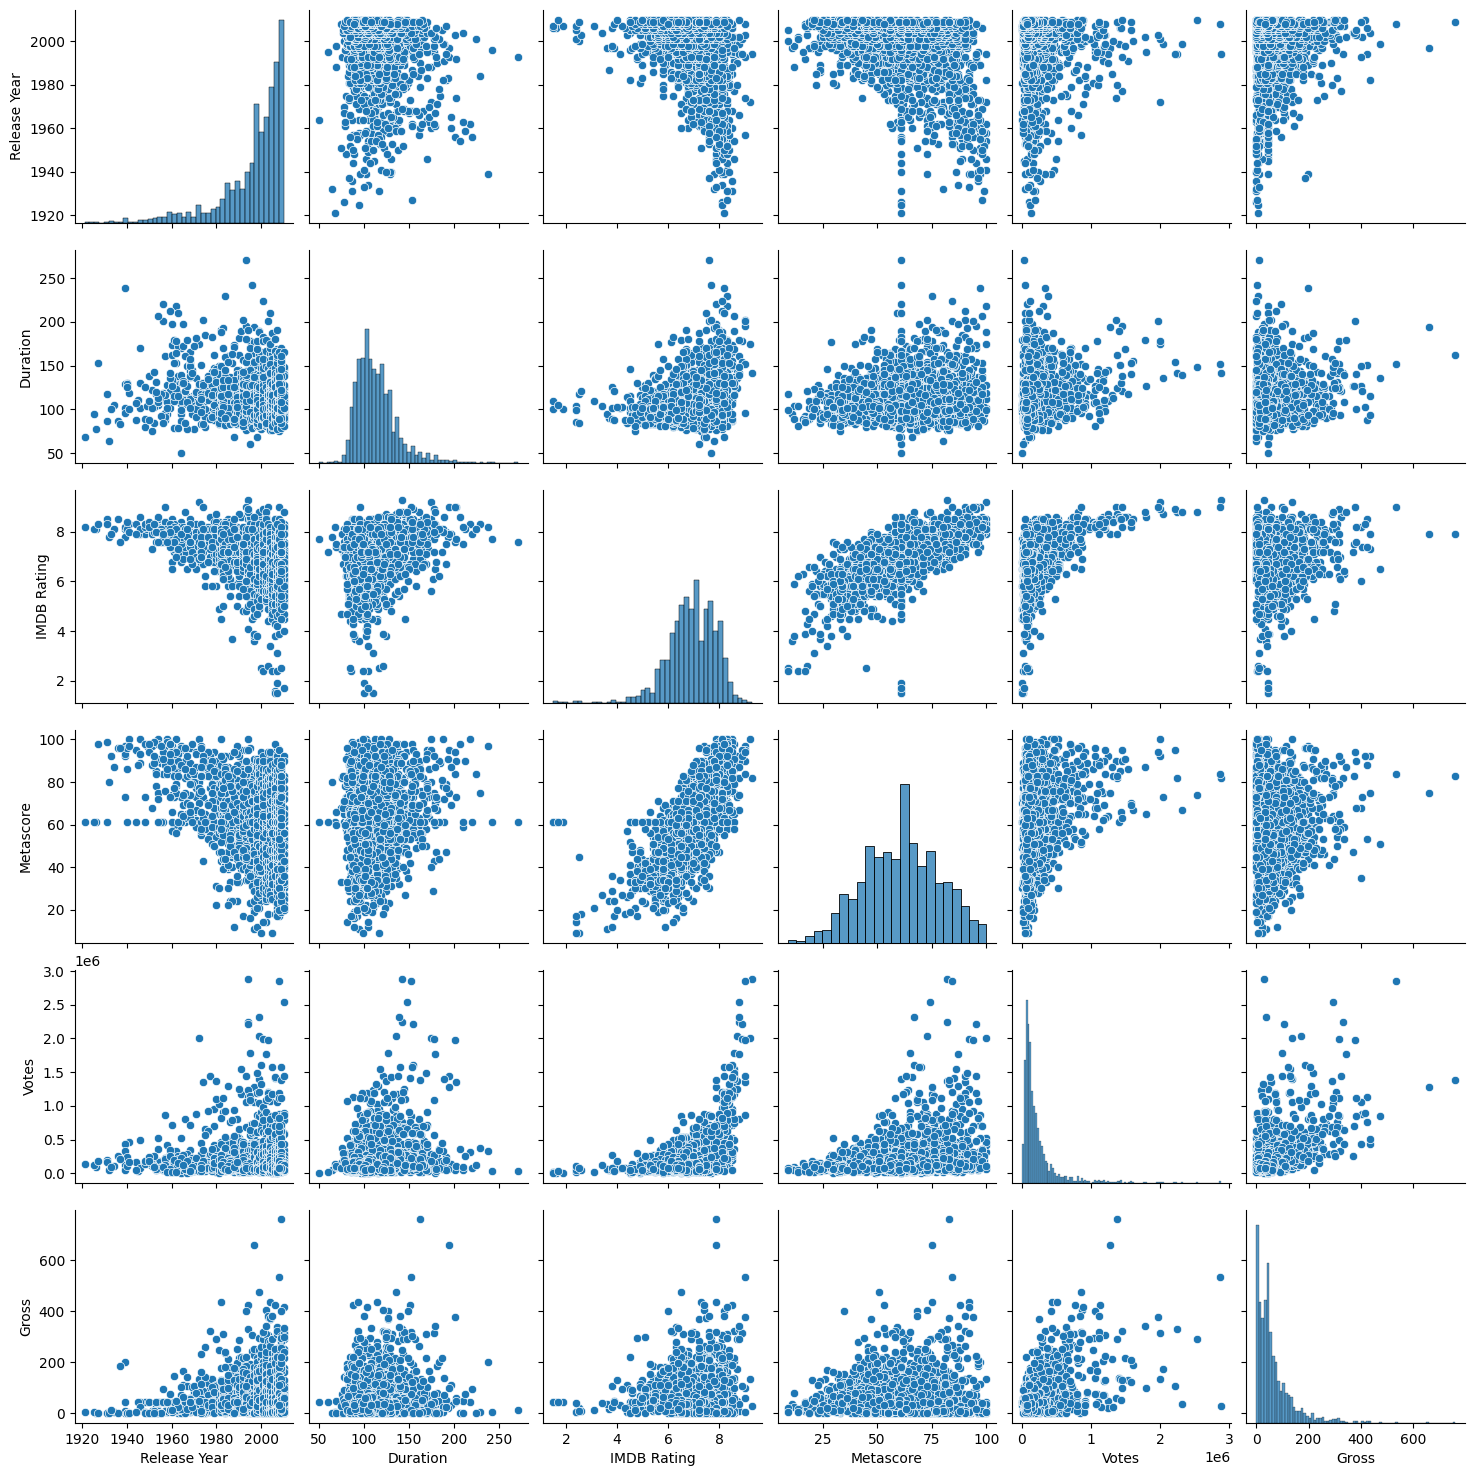

In [196]:
sns.pairplot(df[num_cols])
plt.show()

In [197]:
df['Category'] = pd.cut(df['IMDB Rating'],bins=[0,7,8,10],labels=['Low','Medium','High'])

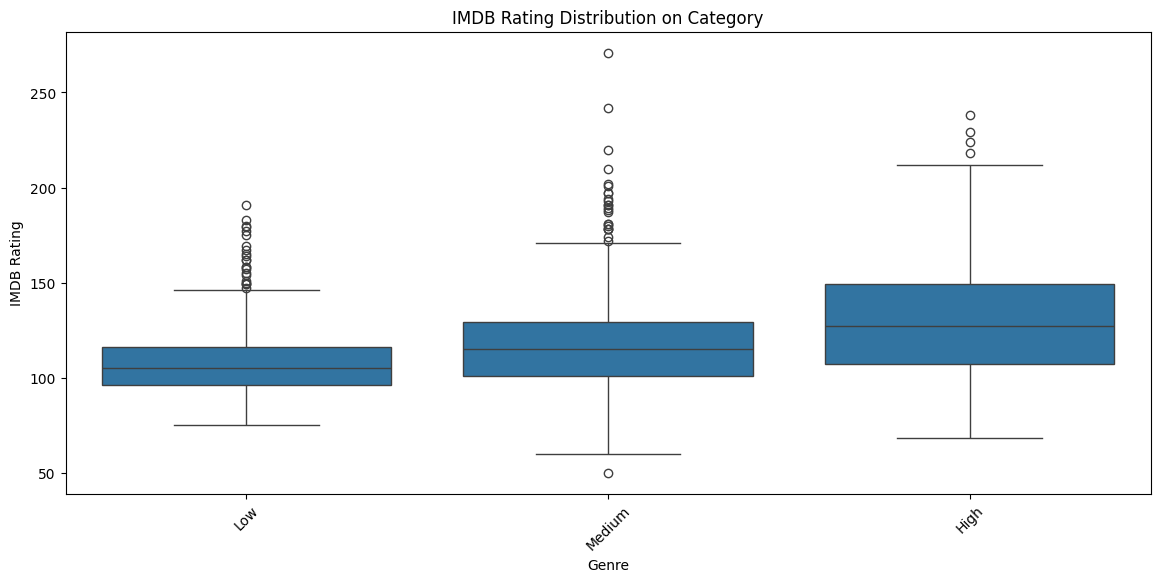

In [198]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Category', y='Duration')
plt.xticks(rotation=45)
plt.title("IMDB Rating Distribution on Category")
plt.xlabel("Genre")
plt.ylabel("IMDB Rating")
plt.show()

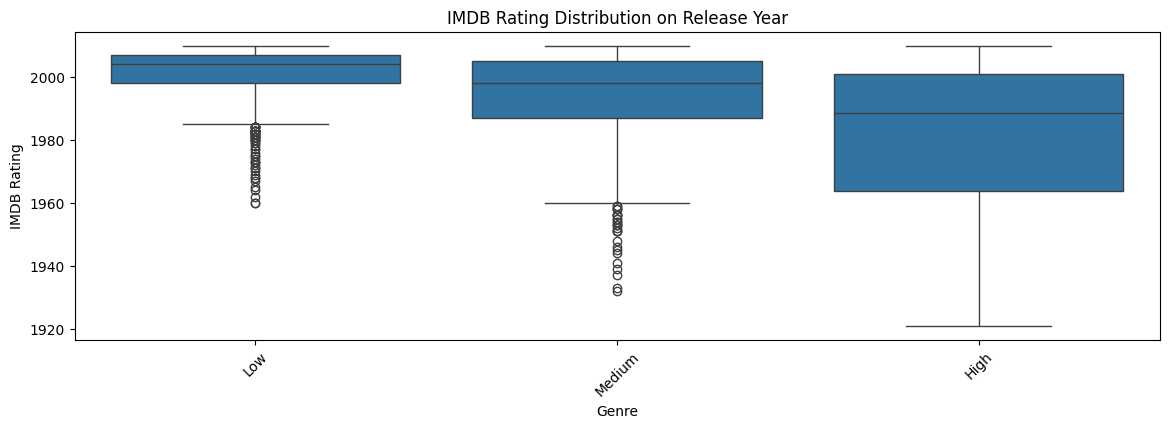

In [199]:
plt.figure(figsize=(14,4))
sns.boxplot(data=df, x='Category', y='Release Year')
plt.xticks(rotation=45)
plt.title("IMDB Rating Distribution on Release Year")
plt.xlabel("Genre")
plt.ylabel("IMDB Rating")
plt.show()

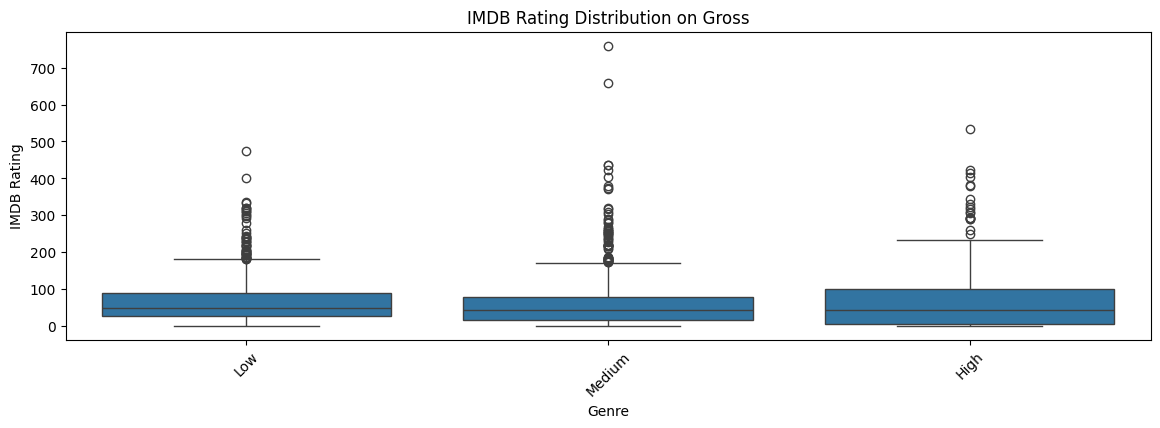

In [200]:
plt.figure(figsize=(14,4))
sns.boxplot(data=df, x='Category', y='Gross')
plt.xticks(rotation=45)
plt.title("IMDB Rating Distribution on Gross")
plt.xlabel("Genre")
plt.ylabel("IMDB Rating")
plt.show()

In [201]:
no_movies = df.groupby("Release Year").size()

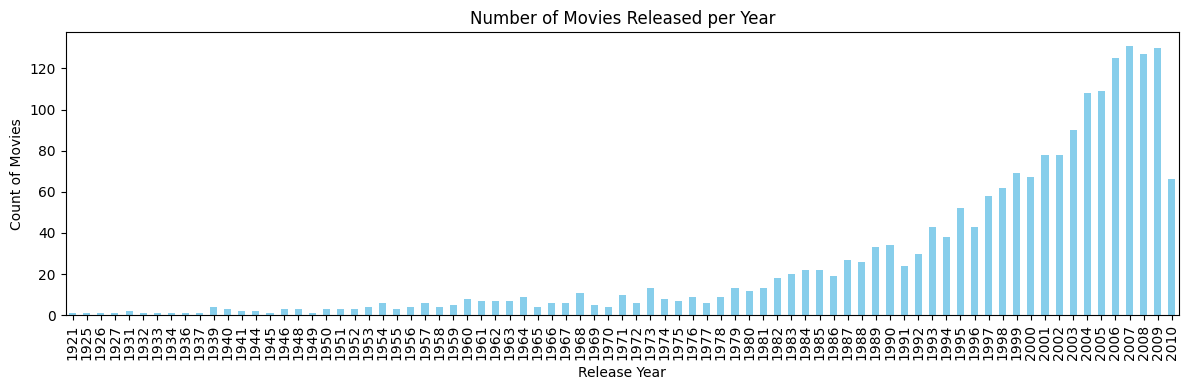

In [202]:
plt.figure(figsize=(12,4))
no_movies.plot(kind="bar", color="skyblue")
plt.title("Number of Movies Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count of Movies")
plt.tight_layout()
plt.show()

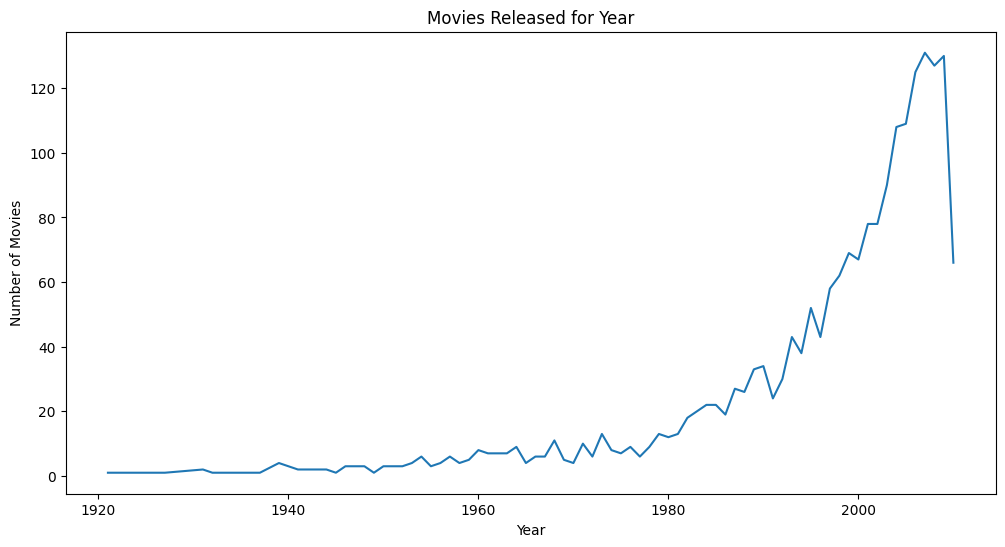

In [203]:
plt.figure(figsize=(12,6))
df['Release Year'].value_counts().sort_index().plot()
plt.title("Movies Released for Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

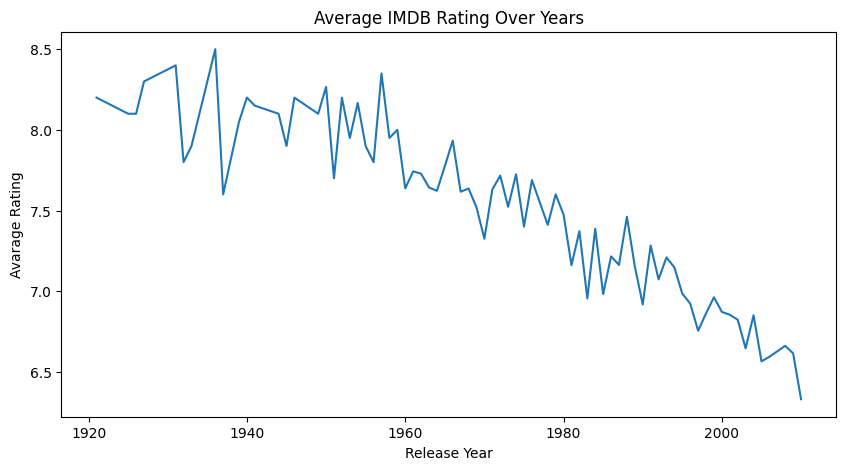

In [204]:
plt.figure(figsize=(10,5))
df.groupby('Release Year')['IMDB Rating'].mean().plot()
plt.title("Average IMDB Rating Over Years")
plt.xlabel("Release Year")
plt.ylabel("Avarage Rating")
plt.show()

# spilt genre column multiple binary columns
Movies often have multiple genres like "Crime, Drama".
We convert them into binary columns:


In [205]:
df['Genre'] = df['Genre'].astype(str)

In [206]:
genre_dummies = df['Genre'].str.get_dummies(sep=', ')

In [207]:
df = pd.concat([df,genre_dummies],axis=1)

In [208]:
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,57.30,...,0,0,0,0,0,0,0,0,0,0
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,54.80,...,0,0,0,0,0,0,0,0,0,0
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82,...,0,0,0,0,0,0,0,0,0,0
4,Straw Dogs,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,44.82,...,0,0,0,0,0,0,0,1,0,0


#We combine numeric features + genre dummy columns:

In [209]:
# Select numeric columns
numeric_col = ['Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Gross']

In [210]:
# Combine numeric + genre columns
features = df[numeric_col + list(genre_dummies.columns)]

In [211]:
# Handle missing values
features = features.fillna(features.median())

In [212]:
scaler = StandardScaler()

In [213]:
scaled_features = scaler.fit_transform(features)

#Apply K-Means Clustering

In [214]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [215]:
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [216]:
df[['Movie Name', 'IMDB Rating', 'Cluster']].head()

,Movie Name,IMDB Rating,Cluster
0,The Godfather,9.2,1
1,The Godfather Part II,9.0,1
2,Ordinary People,7.7,0
3,Lawrence of Arabia,8.3,0
4,Straw Dogs,7.4,1


In [217]:
cluster_summary = df.groupby("Cluster")[["IMDB Rating","Gross","Votes","Duration"]].mean()

In [218]:
print(cluster_summary)

         IMDB Rating      Gross          Votes    Duration
Cluster                                                   
0           7.338497  43.383972  181033.095092  121.995399
1           7.039640  83.350685  335664.432432  119.572973
2           6.486631  44.072460  180652.358289  102.652406
3           7.344898  43.268571  162282.571429  139.306122
4           6.428366  81.494596  182638.204668  100.452424


#Plotly Interactive Cluster Visualization

In [219]:
plot = px.scatter(df, x='IMDB Rating', y='Metascore', color='Cluster', hover_data=['Movie Name', 'Genre', 'Votes'],
                  title='Interactive Cluster Visualization', color_continuous_scale='Viridis')
plot.show()

In [220]:
plot = px.scatter(df, x='Duration', y='Metascore', color='Cluster', hover_data=['Movie Name','Genre','IMDB Rating'],
                  title='Duration vs Metascore', color_continuous_scale='Viridis')
plot.show()